# 제로베이스 ML 과제 1
## 최동원 선수가 현역이라면 연봉 얼마를 받을까?
최동원 선수가 활동하던 당시의 스탯으로 현재 활약을 하고 있다고 가정하면 연봉이 얼마인가를 머신러닝 모델로 예측하는 프로젝트이다.

### 과제 수행 방향
- 2015~2023년에 활동한 투수들의 데이터(연봉 포함)를 수집해서 학습용 데이터로 이용하려고 한다.
- 머신러닝 모델을 이용해서 regression을 진행한다.
- 최동원 선수가 활동한 기간인 1983~1988년에 활동한 투수들의 데이터(연봉 미포함)를 수집한 후 모델을 이용해서 해당 선수들이 현재 활동하고 있는 경우의 연봉을 예측한다.
- 최동원 선수의 예측값을 알아보고 나름대로 분석해본다.

데이터 출처: statiz

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

### 데이터 수집 및 전 처리

먼저, 2015년~2023년까지 투수들의 데이터를 수집하려고 한다. statiz사이트를 크롤링하려고 하는데, 활동내역과 연봉 정보를 따로따로 크롤링 한 후, 데이터를 join해야 할 것 같다.

In [2]:
# 활동 내역 크롤링
driver = webdriver.Chrome()
driver.get('https://statiz.sporki.com/stats/?m=main&m2=pitching&m3=deepen&so=FIP&ob=ASC&year=1983&sy=2015&ey=2023&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=1000&ph=&hs=&us=&na=&ls=0&sf1=G&sk1=&sv1=&sf2=G&sk2=&sv2=')

In [3]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Find the table element
table = soup.find('table')
df_stat = pd.read_html(str(table))[0]

print(df_stat.tail())
driver.quit()

    Rank Name  Team Sort▲   G   K/9  BB/9  K/BB  HR/9    K%  ...   rRA9-  \
    Rank Name  Team   FIP   G   K/9  BB/9  K/BB  HR/9    K%  ...   rRA9-   
217  182  윤성환  16 P  5.64  28  4.25  2.05  2.07  1.25  11.1  ...   76.54   
218  183  차우찬  18 P  5.84  29  7.20  4.18  1.72  1.43  17.8  ...  125.61   
219  184  금민철  18 P  6.00  29  4.55  3.92  1.16  1.09  11.0  ...   99.95   
220  185  문승원  17 P  6.03  29  4.98  3.13  1.59  1.45  12.4  ...   99.38   
221  186  김원중  18 P  6.14  30  8.48  4.77  1.78  1.73  20.1  ...  114.48   

       FIP-    AVG    OBP    SLG    OPS    NP    P/G  P/IP  P/PA  
       FIP-    AVG    OBP    SLG    OPS    NP    P/G  P/IP  P/PA  
217  103.75  0.290  0.339  0.457  0.796  2786   99.5  15.5  3.63  
218  119.17  0.269  0.351  0.458  0.809  2956  101.9  17.4  3.88  
219  113.50  0.335  0.404  0.476  0.880  2695   92.9  17.2  3.74  
220  118.67  0.294  0.359  0.474  0.833  2701   93.1  17.4  3.89  
221  111.99  0.295  0.386  0.509  0.895  2717   90.6  18.7  3.99 

/var/folders/d2/b7bnbh8d1mx5rjyb450xlt200000gn/T/ipykernel_35359/1072511254.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stat = pd.read_html(str(table))[0]


In [4]:
# preprocessing
df_stat.columns = df_stat.columns.get_level_values(-1) # 멀티인덱스 컬럼 제거
df_stat.head()

,Rank,Name,Team,FIP,G,K/9,BB/9,K/BB,HR/9,K%,...,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,안우진,22 P,2.09,30,10.29,2.53,4.07,0.18,29.2,...,53.20,52.62,0.188,0.250,0.268,0.518,3003,100.1,15.3,3.92
1,2,페디,23 P,2.22,30,10.43,1.75,5.97,0.45,29.5,...,48.35,53.28,0.207,0.250,0.272,0.522,2904,96.8,16.1,4.10
2,3,안우진,23 P,2.33,24,9.80,2.27,4.32,0.30,27.0,...,54.90,57.22,0.217,0.265,0.292,0.557,2342,97.6,15.5,3.85
3,4,미란다,21 P,2.42,28,11.66,3.27,3.57,0.57,31.7,...,59.22,57.94,0.212,0.282,0.299,0.581,2918,104.2,16.8,4.12
4,5,산체스,19 P,2.54,28,8.07,2.29,3.52,0.11,22.1,...,58.26,59.04,0.244,0.291,0.290,0.581,2538,90.6,15.4,3.78


In [5]:
df_stat = df_stat.drop('FIP▲', axis=1) # 중복 컬럼 제거
print(df_stat.head())

  Rank Name  Team   FIP   G    K/9  BB/9  K/BB  HR/9    K%  ...  rRA9-   FIP-  \
0    1  안우진  22 P  2.09  30  10.29  2.53  4.07  0.18  29.2  ...  53.20  52.62   
1    2   페디  23 P  2.22  30  10.43  1.75  5.97  0.45  29.5  ...  48.35  53.28   
2    3  안우진  23 P  2.33  24   9.80  2.27  4.32  0.30  27.0  ...  54.90  57.22   
3    4  미란다  21 P  2.42  28  11.66  3.27  3.57  0.57  31.7  ...  59.22  57.94   
4    5  산체스  19 P  2.54  28   8.07  2.29  3.52  0.11  22.1  ...  58.26  59.04   

     AVG    OBP    SLG    OPS    NP    P/G  P/IP  P/PA  
0  0.188  0.250  0.268  0.518  3003  100.1  15.3  3.92  
1  0.207  0.250  0.272  0.522  2904   96.8  16.1  4.10  
2  0.217  0.265  0.292  0.557  2342   97.6  15.5  3.85  
3  0.212  0.282  0.299  0.581  2918  104.2  16.8  4.12  
4  0.244  0.291  0.290  0.581  2538   90.6  15.4  3.78  

[5 rows x 32 columns]


In [6]:
df_stat = df_stat.drop('Rank', axis=1) # 불필요한 컬럼 제거
print(df_stat.head())

  Name  Team   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  ...  rRA9-   FIP-  \
0  안우진  22 P  2.09  30  10.29  2.53  4.07  0.18  29.2  7.2  ...  53.20  52.62   
1   페디  23 P  2.22  30  10.43  1.75  5.97  0.45  29.5  4.9  ...  48.35  53.28   
2  안우진  23 P  2.33  24   9.80  2.27  4.32  0.30  27.0  6.3  ...  54.90  57.22   
3  미란다  21 P  2.42  28  11.66  3.27  3.57  0.57  31.7  8.9  ...  59.22  57.94   
4  산체스  19 P  2.54  28   8.07  2.29  3.52  0.11  22.1  6.3  ...  58.26  59.04   

     AVG    OBP    SLG    OPS    NP    P/G  P/IP  P/PA  
0  0.188  0.250  0.268  0.518  3003  100.1  15.3  3.92  
1  0.207  0.250  0.272  0.522  2904   96.8  16.1  4.10  
2  0.217  0.265  0.292  0.557  2342   97.6  15.5  3.85  
3  0.212  0.282  0.299  0.581  2918  104.2  16.8  4.12  
4  0.244  0.291  0.290  0.581  2538   90.6  15.4  3.78  

[5 rows x 31 columns]


In [7]:
print(df_stat.head(15))

    Name  Team    FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  ...  rRA9-  \
0    안우진  22 P   2.09  30  10.29  2.53  4.07  0.18  29.2  7.2  ...  53.20   
1     페디  23 P   2.22  30  10.43  1.75  5.97  0.45  29.5  4.9  ...  48.35   
2    안우진  23 P   2.33  24   9.80  2.27  4.32  0.30  27.0  6.3  ...  54.90   
3    미란다  21 P   2.42  28  11.66  3.27  3.57  0.57  31.7  8.9  ...  59.22   
4    산체스  19 P   2.54  28   8.07  2.29  3.52  0.11  22.1  6.3  ...  58.26   
5    양현종  19 P   2.58  29   7.94  1.61  4.94  0.29  22.3  4.5  ...  56.87   
6    브룩스  20 P   2.72  23   7.73  1.43  5.42  0.24  22.2  4.1  ...  48.56   
7   린드블럼  19 P   2.73  30   8.74  1.34  6.52  0.60  24.5  3.8  ...  65.27   
8    고영표  22 P   2.75  28   7.70  1.14  6.78  0.35  20.6  3.0  ...  67.30   
9   루친스키  22 P   2.80  31   9.02  1.58  5.71  0.65  24.3  4.3  ...  75.43   
10  Name  Team  Sort▲   G    K/9  BB/9  K/BB  HR/9    K%  BB%  ...  rRA9-   
11  Name  Team    FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  ...  rRA9-   

원본 사이트의 특성상 10명에 한번 씩 컬럼이 반복되어 나타나기때문에 이를 삭제해주는 작업이 필요하다.

In [8]:
# Create a boolean mask where rows to delete are False
mask = ~((df_stat.index % 12 == 10) | (df_stat.index % 12 == 11))

# Apply the mask to filter out the unwanted rows
df_stat_filtered = df_stat[mask]
df_stat_filtered = df_stat_filtered.reset_index(drop=True)

print(df_stat_filtered.head(15))

     Name  Team   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  ...  rRA9-  \
0     안우진  22 P  2.09  30  10.29  2.53  4.07  0.18  29.2  7.2  ...  53.20   
1      페디  23 P  2.22  30  10.43  1.75  5.97  0.45  29.5  4.9  ...  48.35   
2     안우진  23 P  2.33  24   9.80  2.27  4.32  0.30  27.0  6.3  ...  54.90   
3     미란다  21 P  2.42  28  11.66  3.27  3.57  0.57  31.7  8.9  ...  59.22   
4     산체스  19 P  2.54  28   8.07  2.29  3.52  0.11  22.1  6.3  ...  58.26   
5     양현종  19 P  2.58  29   7.94  1.61  4.94  0.29  22.3  4.5  ...  56.87   
6     브룩스  20 P  2.72  23   7.73  1.43  5.42  0.24  22.2  4.1  ...  48.56   
7    린드블럼  19 P  2.73  30   8.74  1.34  6.52  0.60  24.5  3.8  ...  65.27   
8     고영표  22 P  2.75  28   7.70  1.14  6.78  0.35  20.6  3.0  ...  67.30   
9    루친스키  22 P  2.80  31   9.02  1.58  5.71  0.65  24.3  4.3  ...  75.43   
10    박세웅  22 P  2.84  28   8.35  1.83  4.56  0.46  21.5  4.7  ...  90.86   
11    요키시  22 P  2.86  30   7.48  1.60  4.67  0.39  20.6  4.4  ...  68.93   

2015~2023년 투수들의 연봉데이터 수집

In [9]:
driver = webdriver.Chrome()
driver.get('https://statiz.sporki.com/stats/?m=main&m2=pitching&m3=value&so=&ob=&year=1983&sy=2015&ey=2023&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=1000&ph=&hs=&us=&na=&ls=0&sf1=G&sk1=&sv1=&sf2=G&sk2=&sv2=')

soup = BeautifulSoup(driver.page_source, 'html.parser')

# Find the table element
table = soup.find('table')
df_value = pd.read_html(str(table))[0]

print(df_value.tail())  # Print the first few rows of the dataframe

driver.quit()

    Rank Name  Team  Sort▼   G Inning                RPW     RAA  ...   RAR  \
    Rank Name  Team WAR-종합   G     선발   구원     종합    RPW      선발  ...    구원   
217  182  임찬규  18 P   1.41  29  142.1  4.1  146.2  12.68  -13.48  ...  2.68   
218  183   핀토  20 P   1.15  30  162.0  0.0  162.0  12.13  -18.40  ...   NaN   
219  184  김원중  18 P   1.11  30  145.1  0.0  145.1  12.84  -16.42  ...   NaN   
220  185   김민  19 P   0.85  27  146.2  4.0  150.2  10.80  -18.20  ...  1.08   
221  186   터너  19 P   0.73  28  153.1  0.0  153.1  12.01  -21.99  ...   NaN   

              WAA                WAR                 연봉 WAR당 연봉  
        종합     선발    구원     종합    선발    구원   종합▼     연봉 WAR당 연봉  
217  15.96  -1.06  0.10  -0.96  1.27  0.14  1.41  11500    8165  
218  11.85  -1.52   NaN  -1.52  1.15   NaN  1.15  45000   39056  
219  10.89  -1.28   NaN  -1.28  1.11   NaN  1.11   6300    5697  
220   7.88  -1.68  0.06  -1.63  0.76  0.09  0.85   4000    4724  
221   4.14  -1.83   NaN  -1.83  0.73   NaN  0.73  

/var/folders/d2/b7bnbh8d1mx5rjyb450xlt200000gn/T/ipykernel_35359/216116556.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_value = pd.read_html(str(table))[0]


In [10]:
# preprocessing
df_value.columns = df_value.columns.get_level_values(-1) # 멀티인덱스 컬럼 제거
df_value.tail()

,Rank,Name,Team,WAR-종합,G,선발,구원,종합,RPW,선발,...,구원,종합,선발,구원,종합,선발,구원,종합▼,연봉,WAR당 연봉
217,182,임찬규,18 P,1.41,29,142.1,4.1,146.2,12.68,-13.48,...,2.68,15.96,-1.06,0.10,-0.96,1.27,0.14,1.41,11500,8165
218,183,핀토,20 P,1.15,30,162.0,0.0,162.0,12.13,-18.40,...,NaN,11.85,-1.52,NaN,-1.52,1.15,NaN,1.15,45000,39056
219,184,김원중,18 P,1.11,30,145.1,0.0,145.1,12.84,-16.42,...,NaN,10.89,-1.28,NaN,-1.28,1.11,NaN,1.11,6300,5697
220,185,김민,19 P,0.85,27,146.2,4.0,150.2,10.80,-18.20,...,1.08,7.88,-1.68,0.06,-1.63,0.76,0.09,0.85,4000,4724
221,186,터너,19 P,0.73,28,153.1,0.0,153.1,12.01,-21.99,...,NaN,4.14,-1.83,NaN,-1.83,0.73,NaN,0.73,70000,96344


In [11]:
df_value = df_value[['Name', 'Team', '연봉']] # 불필요한 컬럼 삭제

In [12]:
# 반복되는 행 제거
mask = ~((df_value.index % 12 == 10) | (df_value.index % 12 == 11))
df_value_filtered = df_value[mask]
df_value_filtered = df_value_filtered.reset_index(drop=True)

print(df_value_filtered.head(15))

     Name  Team      연봉
0     양현종  15 P   40000
1    알칸타라  20 P   45000
2     안우진  22 P   15000
3      헥터  16 P  170000
4     양현종  19 P  230000
5   스트레일리  20 P   50000
6      페디  23 P   80000
7     브룩스  20 P   47900
8     미란다  21 P   55000
9      헥터  17 P  170000
10    김광현  19 P  150000
11    양현종  16 P   75000
12    후라도  23 P   85000
13     윌슨  18 P   80000
14   린드블럼  15 P   85000


두 데이터 프레임을 이름과 시즌정보를 활용해서 join하려고 한다.

In [13]:
df_stat_filtered['Name'] = df_stat_filtered['Name'].str[:] + df_stat_filtered['Team'].str[:2]
df_value_filtered['Name'] = df_value_filtered['Name'].str[:] + df_value_filtered['Team'].str[:2]
df_stat_filtered['Season'] = df_stat_filtered['Team'].str[:2]
df_stat_filtered = df_stat_filtered.drop('Team', axis=1)
df_value_filtered = df_value_filtered.drop('Team', axis=1)

print(df_stat_filtered.head())
print(df_value_filtered.head())

    Name   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB% K-BB%  ...   FIP-  \
0  안우진22  2.09  30  10.29  2.53  4.07  0.18  29.2  7.2  22.1  ...  52.62   
1   페디23  2.22  30  10.43  1.75  5.97  0.45  29.5  4.9  24.6  ...  53.28   
2  안우진23  2.33  24   9.80  2.27  4.32  0.30  27.0  6.3  20.7  ...  57.22   
3  미란다21  2.42  28  11.66  3.27  3.57  0.57  31.7  8.9  22.8  ...  57.94   
4  산체스19  2.54  28   8.07  2.29  3.52  0.11  22.1  6.3  15.8  ...  59.04   

     AVG    OBP    SLG    OPS    NP    P/G  P/IP  P/PA Season  
0  0.188  0.250  0.268  0.518  3003  100.1  15.3  3.92     22  
1  0.207  0.250  0.272  0.522  2904   96.8  16.1  4.10     23  
2  0.217  0.265  0.292  0.557  2342   97.6  15.5  3.85     23  
3  0.212  0.282  0.299  0.581  2918  104.2  16.8  4.12     21  
4  0.244  0.291  0.290  0.581  2538   90.6  15.4  3.78     19  

[5 rows x 31 columns]
     Name      연봉
0   양현종15   40000
1  알칸타라20   45000
2   안우진22   15000
3    헥터16  170000
4   양현종19  230000


In [14]:
df_train = pd.merge(df_stat_filtered, df_value_filtered, on='Name')
print(df_train.head(15))

       Name   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB% K-BB%  ...    AVG  \
0     안우진22  2.09  30  10.29  2.53  4.07  0.18  29.2  7.2  22.1  ...  0.188   
1      페디23  2.22  30  10.43  1.75  5.97  0.45  29.5  4.9  24.6  ...  0.207   
2     안우진23  2.33  24   9.80  2.27  4.32  0.30  27.0  6.3  20.7  ...  0.217   
3     미란다21  2.42  28  11.66  3.27  3.57  0.57  31.7  8.9  22.8  ...  0.212   
4     산체스19  2.54  28   8.07  2.29  3.52  0.11  22.1  6.3  15.8  ...  0.244   
5     양현종19  2.58  29   7.94  1.61  4.94  0.29  22.3  4.5  17.8  ...  0.241   
6     브룩스20  2.72  23   7.73  1.43  5.42  0.24  22.2  4.1  18.1  ...  0.238   
7    린드블럼19  2.73  30   8.74  1.34  6.52  0.60  24.5  3.8  20.7  ...  0.226   
8     고영표22  2.75  28   7.70  1.14  6.78  0.35  20.6  3.0  17.5  ...  0.269   
9    루친스키22  2.80  31   9.02  1.58  5.71  0.65  24.3  4.3  20.1  ...  0.249   
10    박세웅22  2.84  28   8.35  1.83  4.56  0.46  21.5  4.7  16.8  ...  0.284   
11    요키시22  2.86  30   7.48  1.60  4.67  0.39  20.6

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     186 non-null    object
 1   FIP      186 non-null    object
 2   G        186 non-null    object
 3   K/9      186 non-null    object
 4   BB/9     186 non-null    object
 5   K/BB     186 non-null    object
 6   HR/9     186 non-null    object
 7   K%       186 non-null    object
 8   BB%      186 non-null    object
 9   K-BB%    186 non-null    object
 10  BABIP    186 non-null    object
 11  LOB      186 non-null    object
 12  ERA      186 non-null    object
 13  RA9      186 non-null    object
 14  rRA9     186 non-null    object
 15  rRA9pf   186 non-null    object
 16  xFIP     186 non-null    object
 17  kwERA    186 non-null    object
 18  ERA-FIP  186 non-null    object
 19  ERA-     186 non-null    object
 20  rRA9-    186 non-null    object
 21  FIP-     186 non-null    object
 22  AV

In [16]:
# change into numeric
df_train[df_train.columns.difference(['Name'])] = df_train[df_train.columns.difference(['Name'])].apply(pd.to_numeric, errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     186 non-null    object 
 1   FIP      186 non-null    float64
 2   G        186 non-null    int64  
 3   K/9      186 non-null    float64
 4   BB/9     186 non-null    float64
 5   K/BB     186 non-null    float64
 6   HR/9     186 non-null    float64
 7   K%       186 non-null    float64
 8   BB%      186 non-null    float64
 9   K-BB%    186 non-null    float64
 10  BABIP    186 non-null    float64
 11  LOB      186 non-null    float64
 12  ERA      186 non-null    float64
 13  RA9      186 non-null    float64
 14  rRA9     186 non-null    float64
 15  rRA9pf   186 non-null    float64
 16  xFIP     186 non-null    float64
 17  kwERA    186 non-null    float64
 18  ERA-FIP  186 non-null    float64
 19  ERA-     186 non-null    float64
 20  rRA9-    186 non-null    float64
 21  FIP-     186 non

In [17]:
df_train.isnull().sum().sum() # Null값 확인

np.int64(0)

In [18]:
df_train.tail()

,Name,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,...,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA,Season,연봉
181,윤성환16,5.64,28,4.25,2.05,2.07,1.25,11.1,5.3,5.7,...,0.290,0.339,0.457,0.796,2786,99.5,15.5,3.63,16,80000
182,차우찬18,5.84,29,7.20,4.18,1.72,1.43,17.8,10.4,7.5,...,0.269,0.351,0.458,0.809,2956,101.9,17.4,3.88,18,100000
183,금민철18,6.00,29,4.55,3.92,1.16,1.09,11.0,9.4,1.5,...,0.335,0.404,0.476,0.880,2695,92.9,17.2,3.74,18,8000
184,문승원17,6.03,29,4.98,3.13,1.59,1.45,12.4,7.8,4.6,...,0.294,0.359,0.474,0.833,2701,93.1,17.4,3.89,17,4400
185,김원중18,6.14,30,8.48,4.77,1.78,1.73,20.1,11.3,8.8,...,0.295,0.386,0.509,0.895,2717,90.6,18.7,3.99,18,6300


186명의 데이터를 확보하였다. 머신러닝을 위한 데이터로는 너무 작은 느낌이 있지만 현재 상황으로 최선을 다해보자.

다음은 1983~1988년 선수들의 스탯을 위와 같은 방법으로 확보한다.

In [19]:
driver = webdriver.Chrome()
driver.get('https://statiz.sporki.com/stats/?m=main&m2=pitching&m3=deepen&so=&ob=&year=1983&sy=1983&ey=1988&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=1000&ph=&hs=&us=&na=&ls=0&sf1=G&sk1=&sv1=&sf2=G&sk2=&sv2=')

soup = BeautifulSoup(driver.page_source, 'html.parser')
table = soup.find('table')
df_stat = pd.read_html(str(table))[0]

driver.quit()

# preprocessing
df_stat.columns = df_stat.columns.get_level_values(-1) # 멀티인덱스 컬럼 제거
df_stat = df_stat.drop('FIP▲', axis=1) # 중복 컬럼 제거
df_stat = df_stat.drop('Rank', axis=1) # 불필요한 컬럼 제거

# 불필요한 행 제거
mask = ~((df_stat.index % 12 == 10) | (df_stat.index % 12 == 11))
df_stat_filtered = df_stat[mask]
df_stat_filtered = df_stat_filtered.reset_index(drop=True)

# df_stat_filtered['Name'] = df_stat_filtered['Name'].str[:] + df_stat_filtered['Team'].str[:2]
df_stat_filtered['Season'] = df_stat_filtered['Team'].str[:2]
df_stat_filtered = df_stat_filtered.drop('Team', axis=1)
df_stat_filtered[df_stat_filtered.columns.difference(['Name'])] = df_stat_filtered[df_stat_filtered.columns.difference(['Name'])].apply(pd.to_numeric, errors='coerce')

/var/folders/d2/b7bnbh8d1mx5rjyb450xlt200000gn/T/ipykernel_35359/1832838200.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stat = pd.read_html(str(table))[0]


In [20]:
df_stat_filtered.head(15)

,Name,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,...,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA,Season
0,선동열,0.89,25,8.35,1.62,5.15,0.16,24.3,4.7,19.6,...,24.91,0.187,0.232,NaN,NaN,NaN,NaN,NaN,NaN,85
1,선동열,0.96,31,10.09,1.77,5.71,0.15,29.7,5.2,24.5,...,25.52,0.187,0.238,NaN,NaN,NaN,NaN,NaN,NaN,88
2,선동열,1.02,39,7.33,1.78,4.12,0.07,22.0,5.3,16.7,...,32.01,0.170,0.221,NaN,NaN,NaN,NaN,NaN,NaN,86
3,최동원,1.34,39,7.01,1.85,3.78,0.24,20.0,5.3,14.7,...,42.14,0.215,0.262,NaN,NaN,NaN,NaN,NaN,NaN,86
4,선동열,1.56,31,8.00,2.61,3.06,0.11,23.8,7.8,16.1,...,44.28,0.166,0.236,NaN,NaN,NaN,NaN,NaN,NaN,87
5,최동원,1.69,42,6.44,1.64,3.93,0.28,18.6,4.7,13.9,...,49.16,0.214,0.257,NaN,NaN,NaN,NaN,NaN,NaN,85
6,최동원,2.11,51,7.05,2.15,3.28,0.57,19.7,6.0,13.7,...,61.89,0.223,0.279,NaN,NaN,NaN,NaN,NaN,NaN,84
7,최동원,2.11,32,6.55,2.45,2.67,0.24,17.7,6.6,11.1,...,56.87,0.262,0.317,NaN,NaN,NaN,NaN,NaN,NaN,87
8,박동수,2.18,30,4.12,1.88,2.19,0.12,11.1,5.1,6.0,...,68.44,0.243,0.296,NaN,NaN,NaN,NaN,NaN,NaN,86
9,김일융,2.18,38,6.28,3.16,1.99,0.28,17.1,8.6,8.5,...,62.92,0.238,0.310,NaN,NaN,NaN,NaN,NaN,NaN,84


아쉽게도 160명의 데이터에 대해 전부 개 컬럼이 존재하지 않는다. `df_train`에서 이 6개 컬럼을 삭제해야 할 것 같다.

In [21]:
df_train = df_train.drop(['SLG', 'OPS', 'NP', 'P/G', 'P/IP', 'P/PA', 'xFIP'], axis=1)
df_stat_filtered = df_stat_filtered.drop(['SLG', 'OPS', 'NP', 'P/G', 'P/IP', 'P/PA', 'xFIP'], axis=1)

In [22]:
print(df_train.head())

    Name   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  K-BB%  ...  rRA9pf  \
0  안우진22  2.09  30  10.29  2.53  4.07  0.18  29.2  7.2   22.1  ...    2.36   
1   페디23  2.22  30  10.43  1.75  5.97  0.45  29.5  4.9   24.6  ...    2.25   
2  안우진23  2.33  24   9.80  2.27  4.32  0.30  27.0  6.3   20.7  ...    2.50   
3  미란다21  2.42  28  11.66  3.27  3.57  0.57  31.7  8.9   22.8  ...    2.73   
4  산체스19  2.54  28   8.07  2.29  3.52  0.11  22.1  6.3   15.8  ...    2.77   

   kwERA  ERA-FIP   ERA-  rRA9-   FIP-    AVG    OBP  Season     연봉  
0   2.75     0.03  53.25  53.20  52.62  0.188  0.250      22  15000  
1   2.45    -0.22  47.99  48.35  53.28  0.207  0.250      23  80000  
2   2.91     0.06  58.79  54.90  57.22  0.217  0.265      23  35000  
3   2.66    -0.09  55.74  59.22  57.94  0.212  0.282      21  55000  
4   3.50     0.08  60.90  58.26  59.04  0.244  0.291      19  95000  

[5 rows x 25 columns]


In [23]:
print(df_stat_filtered.head())

  Name   FIP   G    K/9  BB/9  K/BB  HR/9    K%  BB%  K-BB%  ...  rRA9  \
0  선동열  0.89  25   8.35  1.62  5.15  0.16  24.3  4.7   19.6  ...  2.43   
1  선동열  0.96  31  10.09  1.77  5.71  0.15  29.7  5.2   24.5  ...  1.46   
2  선동열  1.02  39   7.33  1.78  4.12  0.07  22.0  5.3   16.7  ...  1.30   
3  최동원  1.34  39   7.01  1.85  3.78  0.24  20.0  5.3   14.7  ...  2.02   
4  선동열  1.56  31   8.00  2.61  3.06  0.11  23.8  7.8   16.1  ...  1.17   

   rRA9pf  kwERA  ERA-FIP   ERA-  rRA9-   FIP-    AVG    OBP  Season  
0    2.41   3.05     0.82  48.41  58.36  24.91  0.187  0.232      85  
1    1.50   2.46     0.25  32.57  35.74  25.52  0.187  0.238      88  
2    1.28   3.40    -0.02  31.71  34.28  32.01  0.170  0.221      86  
3    1.99   3.63     0.21  49.41  53.09  42.14  0.215  0.262      86  
4    1.19   3.47    -0.67  25.55  30.14  44.28  0.166  0.236      87  

[5 rows x 24 columns]


In [24]:
df_stat_filtered.isnull().sum().sum()

np.int64(0)

데이터 확보 및 전처리 완료!

### 머신러닝 모델링

In [25]:
import numpy as np
import xgboost

from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

머신러닝 모델은 개인적으로 선호하는 xgboost를 이용하려고 한다.

원칙적으로는 다양한 모델을 이용해서 평가해보고 성능 좋은 모델을 선택하거나 앙상블할 수 있겠지만, 데이터의 개수가 적은 이유로 큰 의의가 없을 것 같은 느낌이 든다.

In [26]:
X = df_train.drop(columns=['연봉', 'Name'], axis=1)
y = df_train['연봉']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=3)

In [27]:
xgb_model = XGBRegressor(n_estimators=80, learning_rate=0.15, gamma=0, subsample=0.75,
                           colsample_bytree=0.5, max_depth=7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

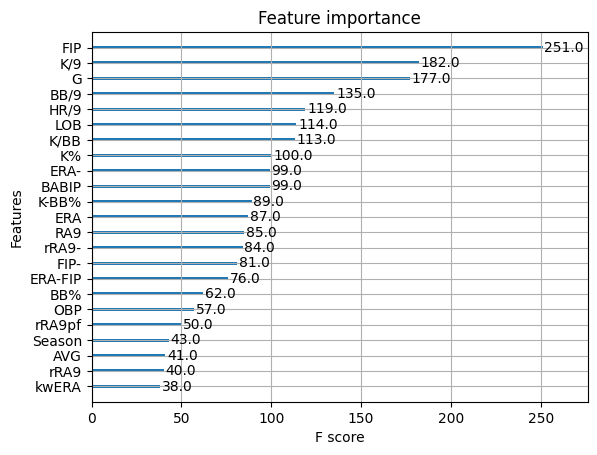

In [28]:
xgboost.plot_importance(xgb_model)

이런 방식으로 어느 컬럼이 더 중요한 가를 확인해 볼 수 있다.

In [29]:
predictions = xgb_model.predict(X_test)
predictions = np.round(predictions, decimals=-3)
print(predictions)

[ 80000. 189000.  52000.  35000. 128000.  59000. 141000.  56000.  60000.
  46000.]


In [30]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(predictions,y_test))
# print(predictions, y_test)

0.9994156956672668
79316.8393217985


이미 예견했던 것과 같이 모델은 오버피팅에 푹 쩔어있고(R^2-score 값이 거의 1과 같음), 테스트 데이터에 대한 예측은 거의 완전 폭망수준(RMSE값이 너무 크다ㅠㅠ)이라고 할 수 있다.

모델의 파라미터 값을 몇가지 조정해보았지만 큰 차이가 없는 것으로 보아 유일한 해결방도는 데이터의 양을 늘리는 것으로 보인다. 현재 상태에서는 본래 계획했던 K-Fold와 같은 방식도 전혀 의미가 없을 것 같아 사용하지 않겠다.

### 최동원 선수의 연봉 예측

In [36]:
df_test = df_stat_filtered[df_stat_filtered['Name']=='최동원']
print(df_test.head(10))

   Name   FIP   G   K/9  BB/9  K/BB  HR/9    K%  BB%  K-BB%  ...  rRA9  \
3   최동원  1.34  39  7.01  1.85  3.78  0.24  20.0  5.3   14.7  ...  2.02   
5   최동원  1.69  42  6.44  1.64  3.93  0.28  18.6  4.7   13.9  ...  2.40   
6   최동원  2.11  51  7.05  2.15  3.28  0.57  19.7  6.0   13.7  ...  2.88   
7   최동원  2.11  32  6.55  2.45  2.67  0.24  17.7  6.6   11.1  ...  3.21   
13  최동원  2.39  38  6.38  2.20  2.90  0.73  17.1  5.9   11.2  ...  3.84   

    rRA9pf  kwERA  ERA-FIP   ERA-  rRA9-   FIP-    AVG    OBP  Season  
3     1.99   3.63     0.21  49.41  53.09  42.14  0.215  0.262      86  
5     2.46   3.74     0.23  56.47  61.67  49.16  0.214  0.257      85  
6     2.81   3.76     0.29  71.56  70.58  61.89  0.223  0.279      84  
7     3.11   4.07     0.70  76.73  74.88  56.87  0.262  0.317      87  
13    3.71   4.05     0.50  85.05  88.92  69.46  0.257  0.308      83  

[5 rows x 24 columns]


현재 활약하고 있다는 것을 가정하기 위해 Season컬럼의 값을 변경해준다.

In [37]:
df_test['Season'] = df_test['Season'] - 64

In [38]:
df_test = df_test.drop('Name', axis=1)
predictions = xgb_model.predict(df_test)
predictions = np.round(predictions, -3)
print(predictions)

[155000.  74000.  54000.  75000.  58000.]


In [42]:
df_test['연봉'] = predictions
df_test['Name'] = '최동원'
df_result = df_test[['Name', 'Season', '연봉']]
# df_result.reset_index(inplace=True)
df_result = df_result.sort_values(by='Season', ascending=True)
df_result

,Name,Season,연봉
13,최동원,19,58000.0
6,최동원,20,54000.0
5,최동원,21,74000.0
3,최동원,22,155000.0
7,최동원,23,75000.0


형편없는 모델의 결과를 해석하는 것이 의미가 있겠나 싶지만, 그래도 최동원 선수가 2019년부터 2023년까지 활약했다고 가정한다면 
- 연봉은 5억 8천부터 시작하고
- 전성기인 2022년에는 15억 5천을 찍을 것으로 예상된다.